<a href="https://colab.research.google.com/github/afonsosr2/bootcamp_DS_Alura/blob/main/Bootcamp_DS_Mod01_Aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Data Science Aplicada

### **Organização:**
Alura Github: https://github.com/alura-cursos

LinkedIn: https://www.linkedin.com/school/aluracursos/

<br>

### **Resolução das aulas e desafios por:**
Afonso Augusto Rios
<br>
Email: afonsosr2@gmail.com

Github: https://github.com/afonsosr2

LinkedIn: https://www.linkedin.com/in/afonsosr2/

# Módulo 01 - Visualizando dados do SUS

## Aula 03
*   Acompanhamento da Aula 03
*   Resolução dos Desafios



Olá, iniciaremos as práticas, análises e estudos sobre dados relativos à saúde no Brasil através do Bootcamp de Data Science Aplicada da Alura. 

Ao longo das aulas vou aplicar o conteúdo aprendido dentro desse curso e resolver os desafios, aproveitando também para fazer minhas próprias análises e olhando os dados de forma mais crítica. 

Vamos começar nosso mergulho? 

### Importando a Base de Dados



Para a nossa segunda análise, vamos importar os dados do site da DATASUS disponibilizados no [link](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/).

Na Aula 03, seguimos explorando os dados relativos aos Procedimentos Hospitalares do SUS de 2008 até os dias atuais. 

Inicialmente, vamos selecionar os dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no ano/mês de atendimento por Unidade Federativa.

In [220]:
#importando a biblioteca do Pandas para a leitura dos dados através de um arquivo .csv
import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/A111646189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows = 3, sep=";", skipfooter = 12, thousands = ".",
                    decimal = ",")

# Modificando o modo de leitura dos valores totais dos gastos.
pd.options.display.float_format = "{:.2f}".format

dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,16 Amapá,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2351019.41,2342718.63,2286375.90,1774558.12,2761503.37,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,153

### Tratando os dados para a visualização em gráfico






Agora, vamos tratar os dados para que possamos trabalhar apenas com as colunas que possuem todos os valores totais dos custos com o SUS nas Unidades da Federação.

Primeiro, vamos verificar quais colunas possuem dados numéricos:

In [221]:
# Testando o modo de leitura imprimindo as médias dos gastos por ano
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

Após analisarmos as colunas com valores numéricos, vamos criar um novo DataFrame que guarde esses valores para analisarmos e visualizarmos esses dados.

In [222]:
# Passando para uma variável do tipo list a posição das colunas com valores numéricos
# e colocando a Unidade de Federação na primeira coluna. 
colunas_completas = dados.mean().index.tolist()
colunas_completas.insert(0,"Unidade da Federação")

Após a criação da lista, vamos criar o nosso novo dataframe seguindo os critérios já explanados.

In [223]:
# Criando o DataFrame dados_completos com as colunas com os valores númericos completos 
# e colocando a Unidade de Federação como index.
dados_completos = dados[colunas_completas]
dados_completos = dados_completos.set_index("Unidade da Federação")

dados_completos.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

### Visualização dos dados em gráficos




Agora, vamos fazer uma breve exploração dos dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no ano/mês de atendimento por Unidade Federativa.

Para isso, vamos plotar inicialmente o gráfico com os valores totais dos gastos em todas as Unidades da Federação nos períodos que separamos anteriormente no nosso DataFrame para fixar o conteúdo de visualizações por gráficos.

Primeiro, vamos ajustar o nosso dataframe para que a visualização por gráfico fique mais fluida. Então, iremos transpor o nosso gráfico fazendo com que os dados da coluna (mês e ano) passem para linha (Unidades da federação) e vice-versa e, além disso, vamos separar os 'ids' das unidades da federação para que apareça apenas o nome dos estados.

In [224]:
# Separando o Id e renomeando o index só com os estados
id_uf = dados_completos.index.str.slice(stop=2)
dados_completos.index = dados_completos.index.str.slice(start=3)
dados_completos.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,2674958.94,2

---

In [225]:
# Tirando a coluna de Totais para não distorcer nosso gráfico
dados_completos = dados_completos.drop("Total", axis=1)

Plotando nosso gráfico com todas Unidades Federais:

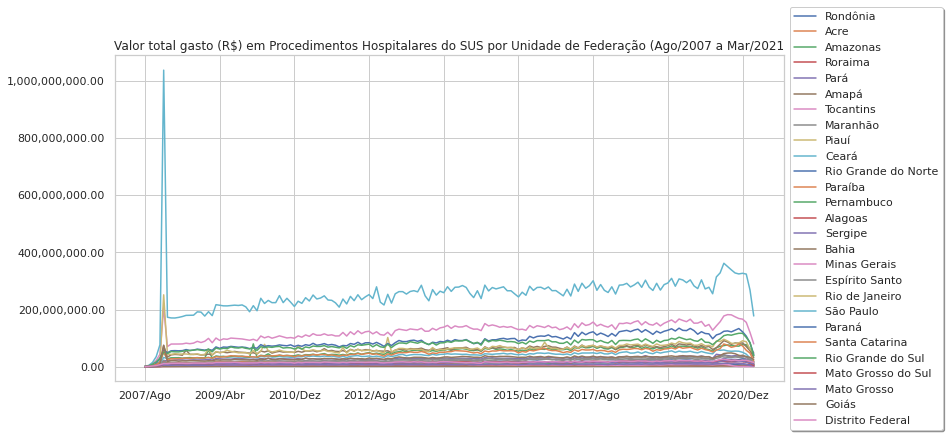

In [226]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados_completos.T.plot(figsize=(12, 6), legend=None)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)

plt.title("Valor total gasto (R$) em Procedimentos Hospitalares do SUS por Unidade de Federação (Ago/2007 a Mar/2021")
plt.show()

Podemos notar que o nosso gráfico não está bom de se visualizar porque além de cores repetidas temos a representação de 27 estados o que impede uma apresentação adequada dos dados.

Vamos tentar mudar as cores adicionando uma nova paleta de cores:


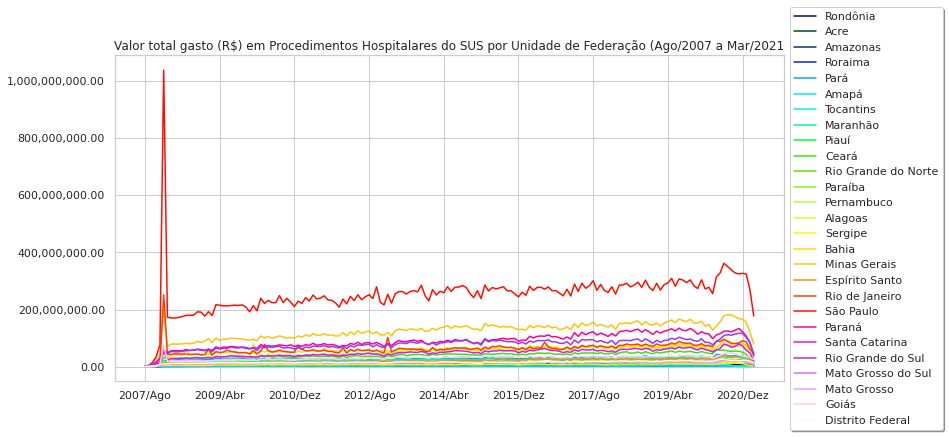

In [227]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados_completos.T.plot(figsize=(12, 6), legend=None, colormap = 'gist_ncar')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)

plt.title("Valor total gasto (R$) em Procedimentos Hospitalares do SUS por Unidade de Federação (Ago/2007 a Mar/2021")
plt.show()

Como podemos notar, ainda não fica muito bom visualmente, principalmente pelo fato de estarmos analisando 27 estados de uma só vez. Por isso, vamos na sequência reduzir nossa análise para os 5 estados que mais gastaram pelo SUS.



---


**Minidesafio**: Adicionar uma coluna mostrando a região (Norte, Nordeste, Sul, Sudeste e Centro-Oeste) de cada estado.

Essa questão é super simples, como já criamos uma lista com as ids dos estados podemos fazer uma pequena ação para transformar os números nos nomes das regiões:



In [228]:
id_uf

Index(['11', '12', '13', '14', '15', '16', '17', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '31', '32', '33', '35', '41', '42', '43', '50',
       '51', '52', '53'],
      dtype='object', name='Unidade da Federação')

In [229]:
# A Id dos estados estão apresentadas abaixo onde as dezenas representam as regiões
# 1 - Norte, 2 - Nordeste, 3 - Sudeste, 4 - Sul, 5 - Centro-Oeste
nome_regioes = ["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"]
nome_regiao = []
for i in range(0, len(id_uf.values)):
  if id_uf.values[i][0] == '1':
    nome_regiao.append(nome_regioes[0])
  elif id_uf.values[i][0] == '2':
    nome_regiao.append(nome_regioes[1])
  elif id_uf.values[i][0] == '3':
    nome_regiao.append(nome_regioes[2])
  elif id_uf.values[i][0] == '4':
    nome_regiao.append(nome_regioes[3])
  elif id_uf.values[i][0] == '5':
    nome_regiao.append(nome_regioes[4])
dados_completos["Região"] = nome_regiao


In [230]:
# Rodando uma amostra qualquer para verificação
dados_completos.sample(5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,44111107.27,44359056.71,42500830.29,43066461.47,44553314.55,41351511.51,43024756.36,60885459.85,40668378.23,52753544.47,48916675.76,51177398.60,57241944.15,53485657.68,51244087.82,48489476.33,48689069.43,49708372.48,44413423.34,55993709.91,44833345.11,54473238.33,78128632.98,56028875.32,51435826.33,53873907.49,57867285.17,53736019.37,52379338.55,50242531.67,...,72453040.87,65060331.66,74428736.76,74579184.72,79419042.03,75991764.07,77576014.21,78916904.64,72869420.27,79188399.76,74018397.83,70831514.10,79663329.44,74142875.38,75063150.71,76859575.91,82670993.34,78689231.48,88182408.00,83624113.30,81561944.39,82534679.94,74778468.98,75149065.87,80411863.59,73147214.02,74595986.00,69437941.81,89725279.21,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48,Sudeste
Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,11969271.76,11299443.00,11548451.89,12422577.60,12419976.84,12302698.99,12005669.60,13150489.00,12358825.51,14445518.57,14434211.04,14622167.93,14209413.80,14459081.79,15051993.46,14045711.83,13162775.24,13197596.70,12889509.22,13484046.67,13295738.66,14928384.44,13535496.11,14394599.86,13863063.00,14051586.56,15073336.93,14636724.40,14052063.36,14277016.84,...,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429251.56,18249176.79,19623112.14,18164306.94,21657768.52,25045580.62,26428483.82,23875303.68,21771866.33,23087586.62,20668526.36,22552034.04,22573869.50,19004029.87,14731938.43,Centro-Oeste
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00,Sudeste
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,24763



---



Prosseguindo, vamos repor as colunas dos totais para fazermos a ordenação pelos 5 estados que mais gastaram:

In [231]:
dados_completos["Total"] = dados_completos.sum(axis=1)
dados_completos.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,Norte,996410650.35
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,Norte,450047246.65
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,Norte,1917245104.64
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2478349.44,2674958.94,2721261.19,2844811.66,2967161.

Agora, nós ordenaremos os estados pelos maiores custos com o SUS e tiraremos a coluna de totais.

In [232]:
# Ordenando pelo maior total gasto e retirando a coluna de totais
dados_ordenados_total = dados_completos.sort_values("Total", ascending=False)
dados_ordenados_total = dados_ordenados_total.drop("Total", axis = 1)
dados_ordenados_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71,Sudeste
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00,Sudeste
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07,Sul
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,5197241

Para prosseguir a análise, vamos plotar os 5 estados com os maiores gastos no SUS no período entre 2007 e 2021:

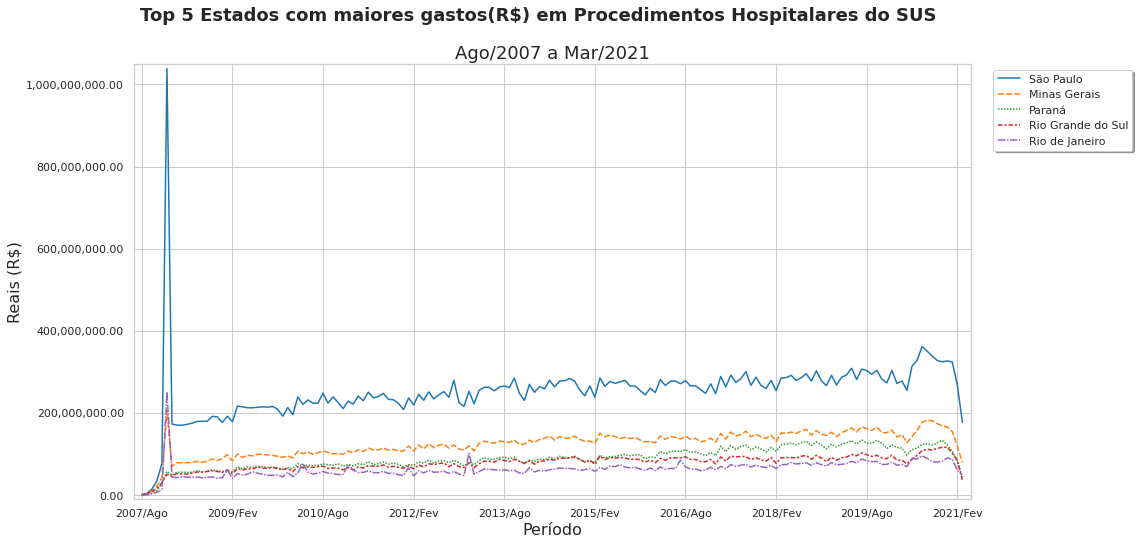

In [233]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Driblando um pequeno bug do Seaborn no Jupyter Notebook e configurando o tamanho de nossa figura
sns.set(context= "notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Dados para plotar
dados_top_5 = dados_ordenados_total.iloc[:, :-1].head(5).T

# Desenhando um gráfico de linhas e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_top_5, palette= "tab10")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Top 5 Estados com maiores gastos(R$) em Procedimentos Hospitalares do SUS",
             size = 18, weight='bold')
plt.title("Ago/2007 a Mar/2021", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.margins(.01, .01)

# Ajustando a posição dos períodos e selecionando um intervalo de 18 meses entre eles
ax.set_xticks(dados_top_5.index[0:164:18])

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fancybox=True, shadow=True)

# Oculta as informações no topo do gráfico
plt.show()

Como podemos notar, existe um período específico em que distorce a  leitura do gráfico e que, portanto, vamos retirá-lo de nossa análise. 

Após o ajuste, vamos visualizar um gráfico mais adequado, aliado ao estado da Bahia, que verificamos na aula anterior que seria o estado da Região Nordeste com maiores gastos no SUS. Assim, teremos 3 Regiões em análise (Sul, Sudeste e Nordeste).

In [234]:
# Tentando localizar o valor discrepante
dados_ordenados_total.iloc[:,0:8]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar
Unidade da Federação,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92
Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02
Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,73947845.87,33410124.06,41316672.72
Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51261210.58,26222079.10,30716361.81
Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50
Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22


In [235]:
# Retirando o período que dificultaria a análise
colunas_desejadas = dados_ordenados_total.columns[6:]
dados_ordenados_total = dados_ordenados_total[colunas_desejadas]

Agora, vamos plotar o gráfico unindo o TOP 5 junto ao estado da Bahia

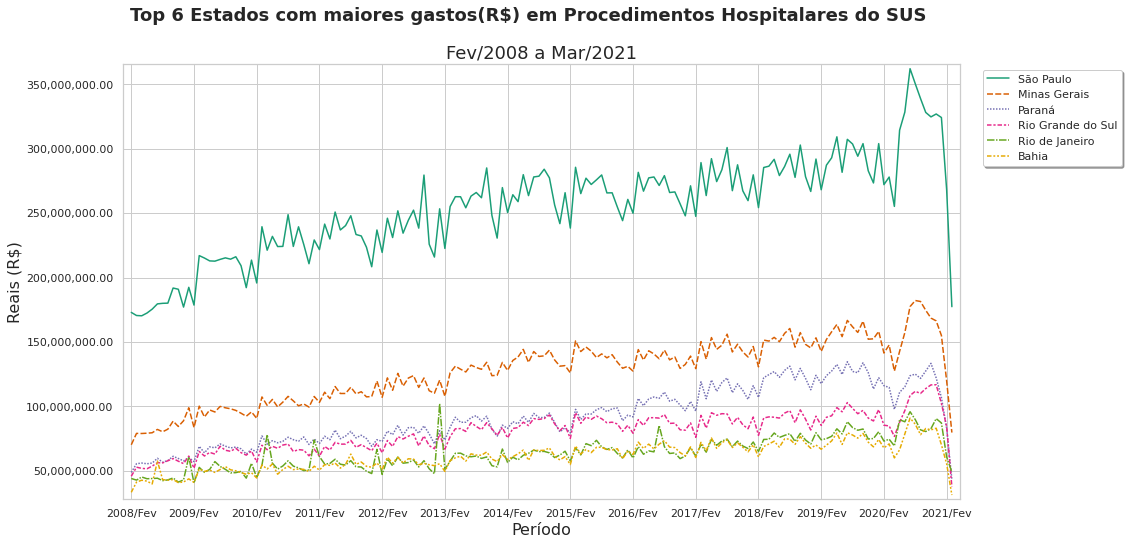

In [236]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Driblando um pequeno bug do Seaborn no Jupyter Notebook e configurando o tamanho de nossa figura
sns.set(context= "notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Dados para plotar
dados_top_5 = dados_ordenados_total.iloc[:, :-1].head(5).T
dados_BA = dados_ordenados_total.iloc[:, :-1].T[["Bahia"]]
dados_6_estados = pd.concat([dados_top_5, dados_BA], axis=1)

# Desenhando um gráfico de linhas e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_6_estados, palette= "Dark2")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Top 6 Estados com maiores gastos(R$) em Procedimentos Hospitalares do SUS",
             size = 18, weight='bold')
plt.title("Fev/2008 a Mar/2021", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.margins(.01, .01)

# Ajustando a posição dos períodos e selecionando um intervalo de 18 meses entre eles
ax.set_xticks(dados_6_estados.index[0:158:12])

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fancybox=True, shadow=True)

# Oculta as informações no topo do gráfico
plt.show()

Um dos desafios dessa aula foi verificar a questão dos picos característicos de alguns estados em fevereiro e durante o período do verão/outono. Uma das suspeitas está em torno dos casos de dengue/zika/chikungunya

Alguns recortes dão a entender que a doença possa ser a causa principal devida sua sazonalidade.

---

Observe o trecho abaixo:

"A Dengue é a arbovirose urbana de maior relevância nas Américas. Ela é transmitida por mosquitos do gênero Aedes e possui como agente etiológico o vírus dengue[...]

[...]A Dengue é uma doença sazonal que apresenta aumento de casos entre os meses de dezembro e maio, coincidindo com o período de altas temperaturas e aumento das chuvas.

Minas Gerais viveu quatro grandes epidemias: 2010, 2013, 2016 e 2019, sendo as epidemias de 2016 e 2019 responsáveis por 53% dos óbitos confirmados desde 2010."

Fonte: https://www.saude.mg.gov.br/duvidasaedes (Secretaria de Estado de Saude - MG)



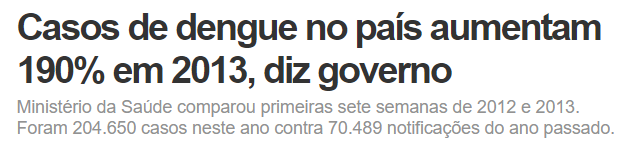

Podemos supor que a dengue tenha forte influência nesses casos, embora não ainda não seja suficiente para afirmar categoricamente em algumas regiões do país. 


---

Agora, vamos traçar um paralelo só da Região Sudeste e verificar se os estados nela presente seguem uma tendência ou se há certas variações.

Para tal, ficaremos atentos aos picos, sobretudo de 2013/Fev, e se nesses casos notamos uma correlação.

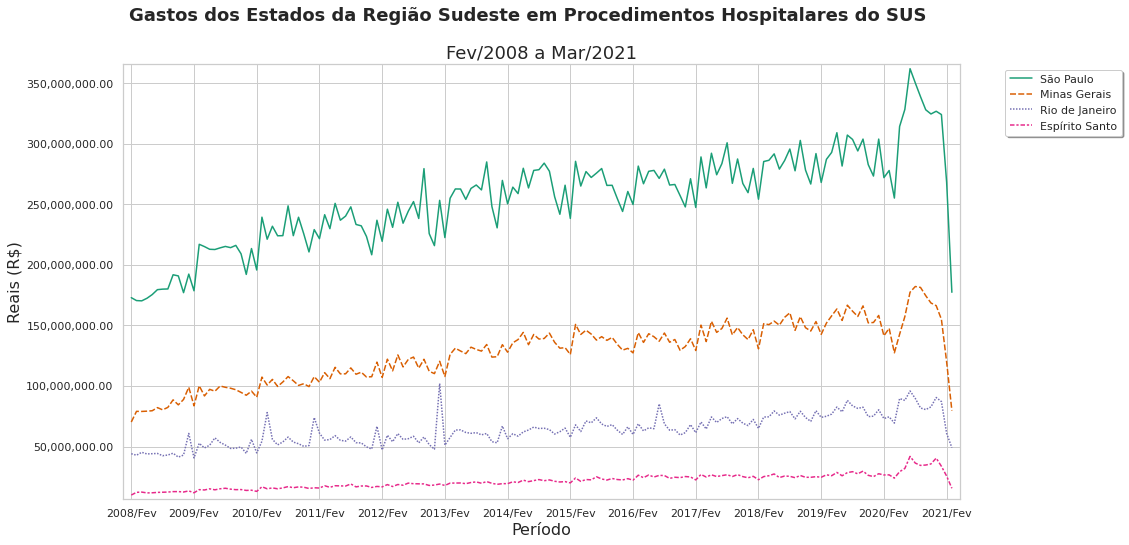

In [237]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Driblando um pequeno bug do Seaborn no Jupyter Notebook e configurando o tamanho de nossa figura
sns.set(context= "notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Dados para plotar
dados_regiao_SE = dados_ordenados_total.query("Região == 'Sudeste'")


# Desenhando um gráfico de linhas e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_regiao_SE.iloc[:, :-1].T, palette= "Dark2")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Gastos dos Estados da Região Sudeste em Procedimentos Hospitalares do SUS",
             size = 18, weight='bold')
plt.title("Fev/2008 a Mar/2021", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.margins(.01, .01)

# Ajustando a posição dos períodos e selecionando um intervalo de 18 meses entre eles
ax.set_xticks(dados_regiao_SE.iloc[:, :-1].T.index[0:158:12])

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fancybox=True, shadow=True)

# Oculta as informações no topo do gráfico
plt.show()

Analisando o gráfico, os estados de Minas Gerais e Espirito Santo não apresentam grandes picos como observados em São Paulo e Rio de Janeiro. 

O Rio de Janeiro, apresenta visivelmente aumento dos gastos com internação no SUS no período do verão, mais fortemente em fevereiro, com o seu pico em 2013, ultrapassando a barreira de 100 milhões com gastos no SUS.

"O dengue no Rio de Janeiro é um problema grave de saúde pública. Somente no período entre 2000 e 2013 foram 616.419 casos notificados pela SMS/RJ. Os anos de 2002, 2008, 2011, 2012 e 2013 respondem por 87% dos casos ocorridos no município no período."

A Figura abaixo, apresenta a taxa de notificação de casos de dengue por 100 mil habitantes no Município do Rio de Janeiro e o modelo ajustado para assinatura sazonal da doença com IC95%, no período de 2000 a 2013."

![Casos de dengue no Município do Rio de Janeiro, Brasil, e o modelo ajustado para assinatura sazonal da doença com intervalo de 95% de confiança, no período de 2000 a 2013.](https://minio.scielo.br/documentstore/1678-4464/YQ5vDJ4QCwf4MC8K6GVRVtL/0a46118379cc6d88e4142a83396c1e34ff460d48.jpg)

Fonte: http://www.scielo.br/j/csp/a/YQ5vDJ4QCwf4MC8K6GVRVtL/?lang=pt# (Adaptado) 

A respeito de Brasil, podemos também trazer um dos pareceres da Coordenação-Geral de Vigilância das Arboviroses em que diz:

"No período de 2003 a maio de 2019, foram notificados 11.137.664 casos prováveis de dengue no Brasil. Observando-se a distribuição dos casos prováveis no período, destacam-se cinco anos epidêmicos, sendo o primeiro em 2008, com a circulação do DENV2. Posteriormente, o Brasil enfrentou epidemias nos anos de 2010, 2013, 2015 e 2016, marcadas pela
reintrodução de novos sorotipos (anos 2010 e 2013), bem como a introdução das novas arboviroses chikungunya e Zika vírus, respectivamente, assinaladas nas epidemias de 2015 e 2016."

**Figura** Distribuição dos casos prováveis de dengue e óbitos por ano, Brasil, 2003-2019.

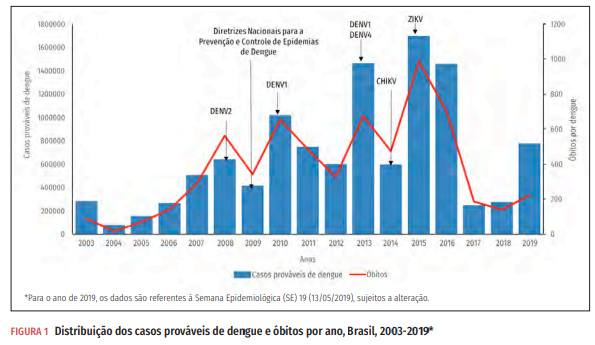

Fonte: Boletim epidemiológico do Ministério da Saúde (2003 - 2019). Disponível em: https://portalarquivos2.saude.gov.br/images/pdf/2019/setembro/25/boletim-especial-21ago19-web.pdf .



---
Por fim, vamos novamente adicionar o estado da Bahia a fim de comparar com os estados do Sudeste.


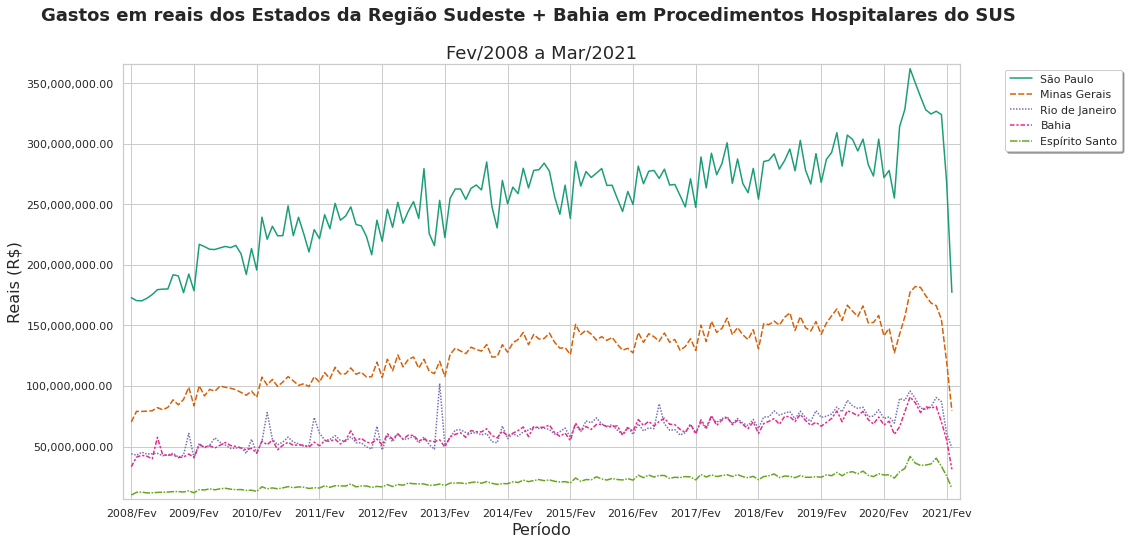

In [238]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Driblando um pequeno bug do Seaborn no Jupyter Notebook e configurando o tamanho de nossa figura
sns.set(context= "notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Dados para plotar
dados_SE_BA = dados_ordenados_total.query("Região == 'Sudeste' or index == 'Bahia'")

# Desenhando um gráfico de linhas e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_SE_BA.iloc[:, :-1].T, palette= "Dark2")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Gastos em reais dos Estados da Região Sudeste + Bahia em Procedimentos Hospitalares do SUS",
             size = 18, weight='bold')
plt.title("Fev/2008 a Mar/2021", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.margins(.01, .01)

# Ajustando a posição dos períodos e selecionando um intervalo de 18 meses entre eles
ax.set_xticks(dados_SE_BA.iloc[:, :-1].T.index[0:158:12])

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fancybox=True, shadow=True)

# Oculta as informações no topo do gráfico
plt.show()

Uma situação bem interessante é a correlação da Bahia com o estado do Rio de Janeiro, exceto nos picos em épocas marcadas por altos casos de dengue. O que nos dá margem a explorar mais nas próximas atividades as similaridades e comportamentos entre o SUS das duas localidades.

Abaixo, deixo o gráfico dos dois estados para melhor visualização dessa semelhança.

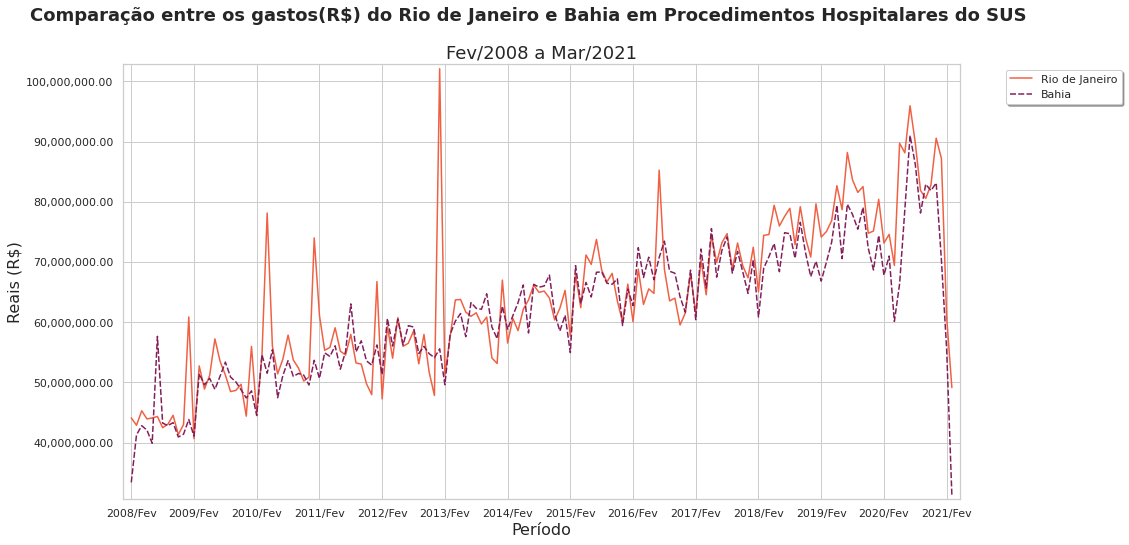

In [239]:
# Driblando um pequeno bug do Seaborn no Jupyter Notebook e configurando o tamanho de nossa figura
sns.set(context= "notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Dados para plotar
dados_RJ_BA = dados_ordenados_total.query("index == 'Bahia' or index == 'Rio de Janeiro'")

# Desenhando um gráfico de linhas e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_RJ_BA.iloc[:, :-1].T, palette= "rocket_r")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Comparação entre os gastos(R$) do Rio de Janeiro e Bahia em Procedimentos Hospitalares do SUS",
             size = 18, weight='bold')
plt.title("Fev/2008 a Mar/2021", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.margins(.01, .01)

# Ajustando a posição dos períodos e selecionando um intervalo de 18 meses entre eles
ax.set_xticks(dados_RJ_BA.iloc[:, :-1].T.index[0:158:12])

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fancybox=True, shadow=True)

# Oculta as informações no topo do gráfico
plt.show()